## FINAL PROJECT ##
Brian Sostek, Birju Patel, Oscar Rodriguez

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

#210-837-0449, Oscar, oscar.rodriguez.stlrs@gmail.com
#610 674 7847, Brian, bsostek99@gmail.com

rent_data = pd.read_csv("contract-rent.csv")
i = 0
rent_headings = ["Neighborhood"]

while i < len(rent_data.columns):
    
    if "Estimate" in rent_data.columns[i] and not "Total" in rent_data.columns[i] and not "No cash rent" in rent_data.columns[i]:
        rent_headings.append(rent_data.columns[i])
    i = i + 1
    
rent_dist = rent_data.loc[:, rent_headings]
rent_dist.set_index("Neighborhood", inplace = True)

In [2]:
bin_rents = [100, 125, 175, 225, 275, 
             325, 375, 425, 475, 525, 
             575, 625, 675, 725, 775, 
             850, 950, 1125, 1375, 1750, 2000]

rent_props = rent_dist.iloc[:, :].div(rent_dist["Estimate; With cash rent:"], axis = 0)
rent_props = rent_props.iloc[:, 1:] * bin_rents

rent_props.loc[:, "average rent"] = rent_props.sum(axis = 1)
average_rent = rent_props["average rent"].mean()
stddev_rent = rent_props["average rent"].std()
rent_props.loc[:, "rent z"] = (rent_props["average rent"] - average_rent) /stddev_rent

rent_z = rent_props.loc[:, "average rent" : "rent z"]

In [3]:
home_data = pd.read_csv("value.csv")
i = 0
home_headings = ["Neighborhood"]

while i < len(home_data.columns):
    
    if "Estimate" in home_data.columns[i]:
        home_headings.append(home_data.columns[i])
    i = i + 1

home_dist = home_data.loc[:, home_headings]
home_dist.set_index("Neighborhood", inplace = True)

In [4]:
bin_value = [10000, 12500, 17500, 22500, 27500,
             32500, 37500, 45000, 55000, 65000,
             75000, 85000, 95000, 112500, 137500,
            162500, 187500, 225000, 275000, 350000,
            450000, 625000, 875000, 1000000]

home_props = home_dist.iloc[:, :].div(home_dist["Estimate; Total:"], axis = 0)
home_props = home_props.iloc[:, 1:] * bin_value

home_props.loc[:, "average home value"] = home_props.sum(axis = 1)
average_value = home_props["average home value"].mean()
stddev_value = home_props["average home value"].std()
home_props.loc[:, "home value z"] = (home_props["average home value"] - average_value) /stddev_value

home_z = home_props.loc[:, "average home value" : "home value z"]

In [5]:
enrollment = pd.read_csv("enrollment.csv")
newData= pd.DataFrame(enrollment[["Neighborhood","Estimate; Total:","Estimate; Enrolled in school:"]])
newList= []
for index, row in newData.iterrows():
    newList.append(row["Estimate; Enrolled in school:"]/row["Estimate; Total:"])

newData['Rate enrolled in school'] = newList
newData['enrollment z'] = (newData["Rate enrolled in school"]-newData["Rate enrolled in school"].mean())/newData["Rate enrolled in school"].std()
enrollment_z = pd.DataFrame(newData[["Neighborhood","Rate enrolled in school","enrollment z"]])
enrollment_z.set_index("Neighborhood", inplace = True)

In [9]:
income = pd.read_csv("income.csv")
DataSet = pd.DataFrame(income[["Neighborhood","Estimate; Aggregate household income in the past 12 months (in 2014 Inflation-adjusted dollars)"]])
DataSet['income z'] = (DataSet["Estimate; Aggregate household income in the past 12 months (in 2014 Inflation-adjusted dollars)"] - DataSet["Estimate; Aggregate household income in the past 12 months (in 2014 Inflation-adjusted dollars)"].mean()) / DataSet["Estimate; Aggregate household income in the past 12 months (in 2014 Inflation-adjusted dollars)"].std()
incomeZ = pd.DataFrame(DataSet[["Neighborhood", "Estimate; Aggregate household income in the past 12 months (in 2014 Inflation-adjusted dollars)", "income z"]])
incomeZ.columns = ["Neighborhood", "economic activity", "economic z"]
incomeZ.set_index("Neighborhood", inplace = True)

In [7]:
enrollment_z

,Rate enrolled in school,enrollment z
Neighborhood,,
Allegheny Center,0.283657,0.182443
Allegheny West,0.177843,-0.641860
Allentown,0.382937,0.955835
Arlington,0.234229,-0.202604
Arlington Heights,0.187793,-0.564343
Banksville,0.106153,-1.200330
Bedford Dwellings,0.269384,0.071257
Beechview,0.229472,-0.239661
Beltzhoover,0.212554,-0.371453


In [17]:
hood_data = incomeZ.join(enrollment_z).join(home_z).join(rent_z)
hood_data.head()

,economic activity,economic z,Rate enrolled in school,enrollment z,average home value,home value z,average rent,rent z
Neighborhood,,,,,,,,
Allegheny Center,28265700,-0.519419,0.283657,0.182443,150000.000000,0.442426,690.661337,0.159915
Allegheny West,23755400,-0.556646,0.177843,-0.641860,248668.831169,1.621387,686.643836,0.143543
Allentown,40566300,-0.417892,0.382937,0.955835,46795.652174,-0.790729,529.980469,-0.494903
Arlington,33111400,-0.479424,0.234229,-0.202604,51098.081023,-0.739321,661.848341,0.042494
Arlington Heights,2515000,-0.731960,0.187793,-0.564343,0.000000,-1.349875,276.204819,-1.529108


Below is the distribution of rents in Pittsburgh by neighborhoods

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb549c87550>]],
      dtype=object)

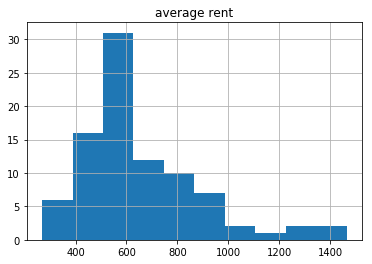

In [75]:
hood_data.hist(column = "average rent")

Here is the distribution of the percentage of people enrolled in school. The average rate is around 0.25. So, a quarter of Pittsburgh's residents are enrolled in school. This is the ideal rate we are searching for in our neighborhood.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb54aa2a748>]],
      dtype=object)

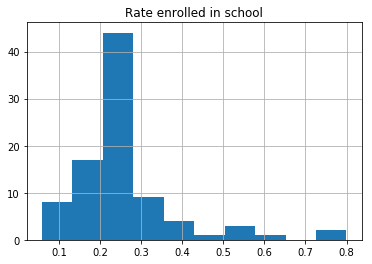

In [19]:
hood_data.hist(column = "Rate enrolled in school")

As you can see, these distributions are very skewed. This reflects the social inequality present in the city. In our data, we see the same few neighborhoods at the top, and the same few neighborhoods at the bottom. Below is a contrast between the top and bottom neighborhoods in terms of average rent.

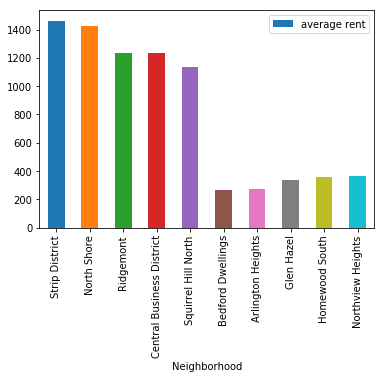

In [119]:
top = hood_data.sort_values(by = "rent z", ascending = False).iloc[0:5]
bottom = hood_data.sort_values(by = "rent z").iloc[0:5]
top_and_bottom = top.append(bottom)
top_and_bottom.plot.bar(y = "average rent")

However, this data is not completely trustworthy. Some neighborhoods were commercial or industrial, and as a result did not have a large population. Because of that small sample size, the data from these neighborhoods is not reliable. For instance, the Strip District had one of the lowest rates of school attendance because it is a commercial area with few families residing there

To develop our metric, we first calculated the z score of each neighborhood in the categories of rent, housing value, educational enrollment, and economic activity (measured by neighborhood-wide income).
Then, we weighed each category by a certain percentage. The market based metrics of rent and house value are the most important, with a weight of 35% each. Since economic activity measures the total productivity of a neighborhood, it is biased against small neighborhoods, and only recieves a 10% weight. Similarly, educational enrollment is biased against neighborhoods in industrial and commercial areas, and only recieves a 20% weight.

In [109]:
patel_metric =pd.DataFrame(hood_data.loc[:, "rent z"] * 0.35 + hood_data.loc[:, "home value z"] * 0.35 + hood_data.loc[:, "enrollment z"] * 0.2+ hood_data.loc[:, "economic z"] * 0.1)
patel_metric.columns = ["patel z"]
final_ranking = patel_metric.sort_values(by = "patel z", ascending = False)

The ten best neighborhoods in Pittsburgh are...

In [112]:
final_ranking.iloc[0:10]

,patel z
Neighborhood,
Squirrel Hill North,3.021147
Shadyside,2.123989
Central Business District,2.099028
Squirrel Hill South,1.750610
Strip District,1.680990
Central Oakland,1.615202
North Oakland,1.606730
Point Breeze,1.258964
South Side Flats,1.015739


And the ten worst...

In [114]:
final_ranking.iloc[len(final_ranking) - 10:]

,patel z
Neighborhood,
Northview Heights,-0.623285
Middle Hill,-0.638551
Esplen,-0.645541
Larimer,-0.650491
Hays,-0.679689
Spring Garden,-0.689398
Homewood West,-0.698108
Bedford Dwellings,-0.819960
Glen Hazel,-1.010095


***Final Report***

**Introduction:**

To rank the neighborhoods, we first looked at Niche, an existing company that uses data to rank things like schools and cities. Niche's methedology involved computing a standardized Z-score for each data point, and then adding weights to each catagories to come up with a final composite score for each object. We decided to follow this method, focusing on quantitative, economic data that could be easily compared across neighborhoods.
We used data from the 2015 American Community Survey because it was in a form that was easily manipulatable and contained everything that we needed. The survey contained information of the distribution of rent and home value by neighborhood, as well as the total economic activity of the areas and their average school attendance. When people move to an area, the main things they have in mind are job opportunities, housing costs, and school quality, so we believed these datasets best captured prospective resident's concerns.
We also considered factoring in crime rates, but the Pittsburgh crime blotter dataset proved difficult to manipulate, with our code giving us bad results.

**Metric:**

We based our data on a weighted sum of the Z scores of each neighborhood in every catagory. We weighed the market based catagories of rent and housing value higher than the intrinsic catagories of school attendance and economic activity. The reason is because we believe that consumers build in the intrinsic qualities of a neighborhood (school quality, safety, jobs, etc.) into the price that they pay to buy a house or rent there.

**The Best Neighborhood**

I am actually concerned that we got Squirrel Hill North as the best. Before we did the project, we looked up the rankings of Pittsburgh neighborhoods on Niche. Squirrel Hill North was listed first. I am afraid that some bias may have slipped into the process.
Looking at the data, the reason Squirrel Hill North blew the other neighborhoods out of the water was because of its very high home values (z = 4.34). My concern is that the ranking elevates rich neighborhoods while neglecting middle class, affordable areas. The question becomes a chicken egg problem. Do rich people cause a neighborhood to be good, or do rich people only recognize and buy real estate in already good areas? Either way, by our metrics, Squirrel Hill North is the best neighborhood. It was consistently a leader in all of our catagories.

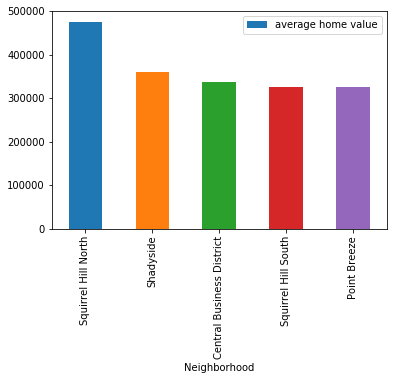

In [123]:
hood_data.sort_values(by = "home value z", ascending = False).iloc[0:5].plot.bar(y = "average home value")

**Birju Conclusion:**

For the project, I wrote the code that analyzed average home value and rent, as well as writing the report. My biggest concern with the ranking is that our metrics are highly coorelated, and that there are liking variables connecting them all. Squirrel Hill and Shadyside, marked best by our metrics, are also predominantly white, upper class neighborhoods. Glen Hazel, Arlington Heights, and Homewood, our worst neighborhoods, are predominantly black, latino, and lower class. I am afraid that race would be just as good of a predictor of neighborhood quality as our supposedly "objective" data. We chose housing value, rent, education, and income because they felt objective, and detached from abstract social concepts. Now I see that they are only reflections of the racism and inequality inherent in our society. Is this really how we want to measure the value of these places that thousands of people call home? Aren't there intangible factors like a sense of community, diversity, and family that are more important to how good a home is? There are, but measuring them quantitatively is difficult, so it is often not done. That is the danger that I now see in 

**Brian Conclusion:**

For the final project, I focused on the enorllment metric. The thought is that a neighborhood with a high percentage of students (or people enrolled in school) is high, those neighborhoods will have more families in them. Our results showed that the mean/median rate of people enrolled in school was about 0.25. But looking at z-scores, Central Oakland had the highest rate of enrolled students, with South Oakland and Squirrel Hill North following behind. Considering that Central Oakland and South Oakland are college residential areas, this does not match with the criteria of finding a neighborhood that is good for families. With that said, Squirrel Hill North is the neighborhood with the greatest concentration of families, assuming my analysis is correct. 


**Oscar Conclusion:**

This project was great in teaching me how to apply what we learned in lab to real life situations. My favorite neighborhood was Squirrel Hill because of how they were consistently at the top of our group’s analysis.